# Linear Regression

* Linear Regression models are a good starting point for regression tasks.

# A. Simple Linear Regression:

* A straight-line fit is a model of the form:
    * $y=ax\ +b$ 
        * where:
            * $a$ = slope
            * $b$ = intercept

* `LinearRegression` Estimator
    * Can also handle multidimensional linear models of the form:
    * $y\ =\ a_0 + a_1x_1\ +\ a_2x_2\ +\  ...$

In [2]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')


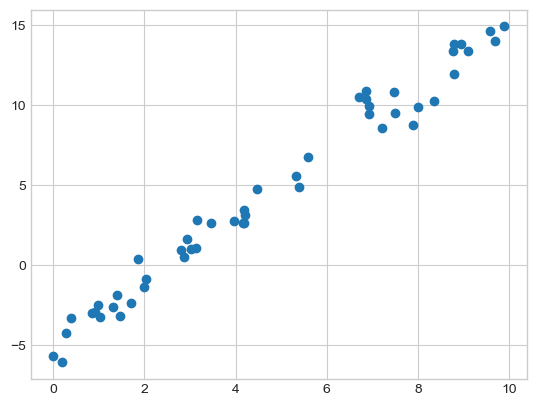

In [5]:
# y = 2x - (b + noise)
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

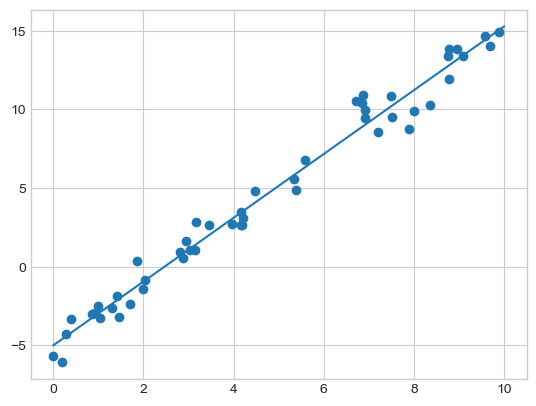

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(x[:, np.newaxis], y)

x_test = np.linspace(0, 10, 1000)
y_pred = lr.predict(x_test[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_test, y_pred);

In [7]:
print("Model slope: ", lr.coef_[0])
print("Model intercept:", lr.intercept_)

Model slope:  2.027208810360695
Model intercept: -4.998577085553202


In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


# B. Basis Function Regression:

* One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.
* The idea is to take this multidimensional linear model:
    * $y\ =\ a_0\ + a_1x_1\ +\ a_2x_2\ +\ a_3x_3\ +\ ...$
    * and build the $x_1,\ x_2,\ x_3 ...$ and so on from our single-dimensional input x. That is, we let $x_n\ =\ f_n(x)$ where $f_n()$ is some function that transforms our data.
    * For example, if $f_n(x)\ =\ x^n$ , our model becomes a polynomial regression:
        *  $y\ =\ a_0\ + a_1x^1\ +\ a_2x^2\ +\ a_3x^3\ +\ ...$
        * This is still a linear model - the linearity refers to the fact that the coefficionts $a_n$ never multiply or divide each other.
        * We have taken our 1D x values and projected them into higher dimension, so that a linear fit can fit more complicated relationships between x and y.

### B.1 Polynomial Basis Functions
* Using `Polynomial Features` transformer:

In [9]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

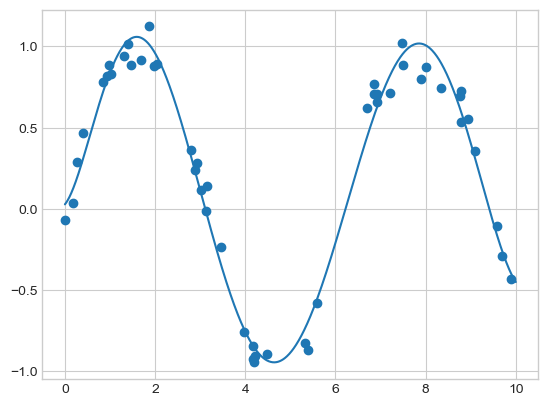

In [10]:
from sklearn.pipeline import make_pipeline

pp = make_pipeline(
    PolynomialFeatures(7),
    LinearRegression()
)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)

pp.fit(x[:, np.newaxis], y)
y_pred = pp.predict(x_test[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_test, y_pred)

### B.2. Gaussian Basis Functions

* One useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
* 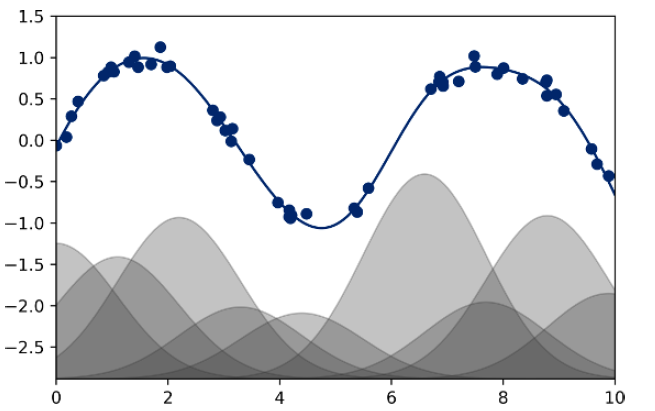
    * The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

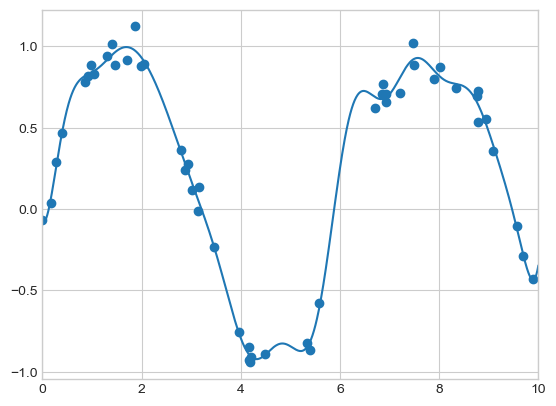

In [12]:
gauss_model = make_pipeline(
    GaussianFeatures(20),
    LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
y_pred = gauss_model.predict(x_test[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_test, y_pred)
plt.xlim(0, 10);

# C. Regularization:

* Basis Function can lead to overfitting
* Regularization:
    * Penalizing large values of the model parameters to prevent overfitting.